In [2]:
using DataFrames

include("../Engine/Engine.jl")
using .Engine

In [64]:
graphs, cascade, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP27_JDD_10_seeds/data.jld2");

In [65]:
graphs2, cascade2,df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_JDD_10_seeds/data.jld2");

In [33]:
test = combine(groupby(df, "partition"), "actor" => (x->length(unique(x))^2) => "count")

edges = edge_types(graphs, df, 0)
edges["prop"] = Vector{Float64}(undef, length(edges["count"]))
for (i,partition) in enumerate(test.partition)
    ind = edges["partition"] .== partition
    edges["prop"][ind] = edges["count"][ind] ./ test.count[i]
end

edges

Dict{String, Any} with 5 entries:
  "edge_type"  => ["T to T", "T to U", "U to T", "U to U", "T to T", "T to U", …
  "proportion" => [0.504065, 0.0108401, 0.00542005, 0.479675, 0.914754, 0.0, 0.…
  "partition"  => ["After COP27", "After COP27", "After COP27", "After COP27", …
  "count"      => [186, 4, 2, 177, 279, 0, 1, 25, 136, 17  …  0, 168, 281, 0, 1…
  "prop"       => [0.00292895, 6.29882e-5, 3.14941e-5, 0.00278723, 0.00305908, …

In [34]:
edges2 = edge_types(graphs2, df2, 0)
edges2["prop"] = edges2["count"] ./ length(unique(df2.actor))^2;

In [35]:
edges = Metrics.combine_dict([edges, edges2])

Dict{String, Any} with 5 entries:
  "edge_type"  => ["T to T", "T to U", "U to T", "U to U", "T to T", "T to U", …
  "proportion" => [0.504065, 0.0108401, 0.00542005, 0.479675, 0.914754, 0.0, 0.…
  "partition"  => ["After COP27", "After COP27", "After COP27", "After COP27", …
  "count"      => [186, 4, 2, 177, 279, 0, 1, 25, 136, 17  …  50, 7, 48, 0, 33,…
  "prop"       => [0.00292895, 6.29882e-5, 3.14941e-5, 0.00278723, 0.00305908, …

In [53]:
function find_number(actors, actions)

    actors_ = unique(actors)
    actions_ = unique(actions)

    tot = Dict(["$a" => 0 for a in actions_])
    tot["remove"] = 0
    for actor in actors_

        indices = findall(actors .== actor)

        check = 0
        for a in actions_
            if any(actions[indices] .== a)
                tot["$a"] += 1
                check += 1
            end
        end

        if check == length(actions_)
            tot["remove"] += 1
        end
    end

    res = Dict()
    for a1 in actions_, a2 in actions_
        if a1 == a2
            res["$a1 to $a2"] = tot[a1] * (tot[a2] - 1)
        else
            res["$a1 to $a2"] = tot[a1] * tot[a2] - tot["remove"]
        end
    end
    return res

end


find_number (generic function with 1 method)

In [71]:
test = combine(groupby(df, "partition"), ["actor", "action"] => find_number => "count")

edges = edge_types(graphs, df, 0)
edges["prop"] = Vector{Float64}(undef, length(edges["count"]))
for (i,partition) in enumerate(test.partition)
    for type in unique(edges["edge_type"])
        ind = edges["partition"] .== partition .&& edges["edge_type"] .== type
        edges["prop"][ind] = edges["count"][ind] ./ test.count[i][type]
    end
end

edges2 = edge_types(graphs2, df2, 0)
edges2["prop"] = Vector{Float64}(undef, length(edges2["count"]))
numbers = find_number(df2.actor, df2.action)
for type in unique(edges2["edge_type"])
    indx = edges2["edge_type"] .== type
    edges2["prop"][indx] = edges2["count"][indx] ./ numbers[type]
end


edges = Metrics.combine_dict([edges, edges2])

Dict{String, Any} with 5 entries:
  "edge_type"  => ["T to T", "T to U", "U to T", "U to U", "T to T", "T to U", …
  "proportion" => [0.504065, 0.0108401, 0.00542005, 0.479675, 0.914754, 0.0, 0.…
  "partition"  => ["After COP27", "After COP27", "After COP27", "After COP27", …
  "count"      => [186, 4, 2, 177, 279, 0, 1, 25, 136, 17  …  50, 7, 48, 0, 33,…
  "prop"       => [0.00325625, 0.000507164, 0.000253582, 0.162534, 0.00327219, …

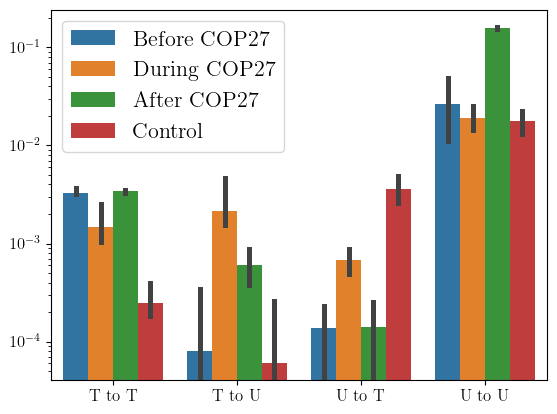

PyObject <AxesSubplot: >

In [73]:
import Seaborn as sns

sns.barplot(edges, x="edge_type", y="prop", hue="partition", hue_order=["Before COP27", "During COP27", "After COP27", "Control"], errorbar=x->(minimum(x), maximum(x)), log=true)

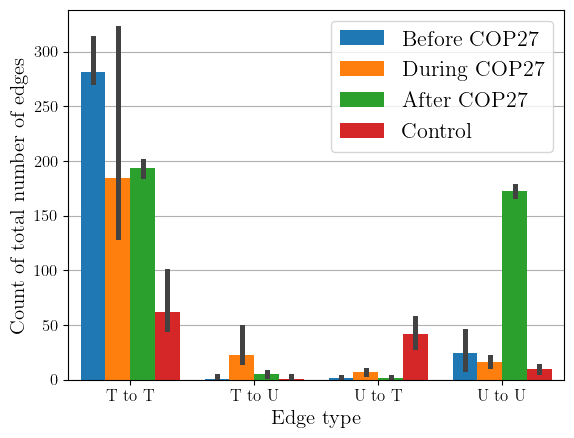

In [37]:
plot_edge_types([graphs, graphs2], [df, df2], [0, 0], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
data = load_data("/Users/cyrilvallez/Desktop/COP27_JDD_10_seeds/data.jld2");
graphs3 = data["multiple_influence_graphs"];

In [ ]:
plot_edge_types([graphs3, graphs2], [df, df2], [0, 0], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
foo1 = edge_types(graphs, df, 0)
foo2 = edge_types(graphs3, df, 0)

In [ ]:
ind1 = foo1["edge_type"] .== "T to T" .&& foo1["partition"] .== "During COP27"
ind2 = foo2["edge_type"] .== "T to T" .&& foo2["partition"] .== "During COP27"

count1 = foo1["count"][ind1]
count2 = foo2["count"][ind2]

In [ ]:
count1

In [5]:
graphs, cascade, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP27_TE_10_seeds/data.jld2");

In [3]:
graphs2, cascade2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_10_seeds/data.jld2");

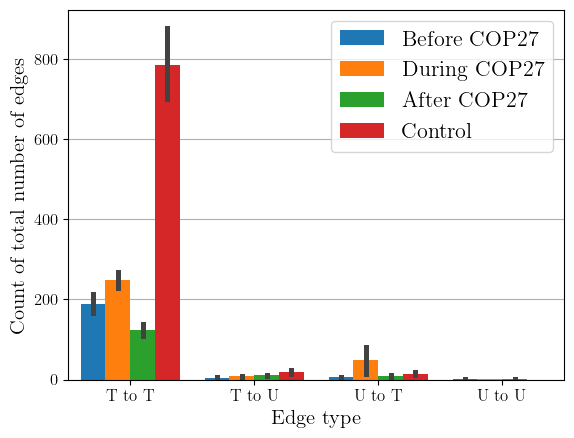

In [6]:
plot_edge_types([graphs, graphs2], [df, df2], [0, 0], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false);#, errorbar=x->(minimum(x), maximum(x)));

In [ ]:
edges = edge_types(graphs, df, 0)

ind = edges["edge_type"] .== "T to T" .&& edges["partition"] .== "During COP26"

count = edges["count"][ind]

In [10]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_NoSurro/data.jld2")
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_NoSurro/data.jld2")

cuttoffs = collect(0:0.1:1.5)

edges = edge_types(graphs, df, cuttoffs[1])
edges["cuttoff"] = repeat([cuttoffs[1]], 12)
for cuttoff in cuttoffs[2:end]
    new_edges = edge_types(graphs, df, cuttoff)
    new_edges["cuttoff"] = repeat([cuttoff], 12)
    edges = Metrics.combine_dict([edges, new_edges])
end
# plot_edge_types([graphs, graphs2], [df, df2], [cuttoff, cuttoff], hue_order=["Before COP27", "During COP27", "After COP27", "Control"], y="count", log=false, errorbar=x->(minimum(x), maximum(x)));

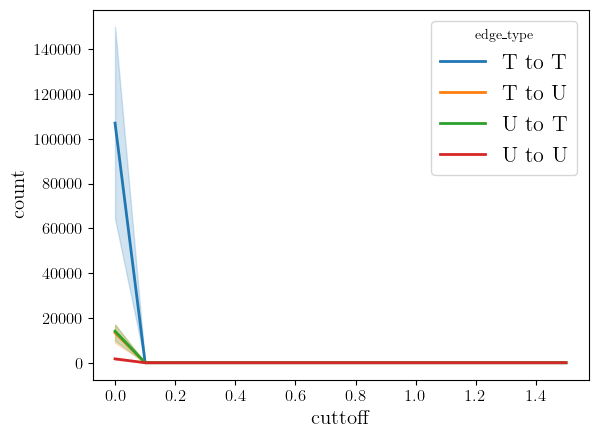

PyObject <AxesSubplot: xlabel='cuttoff', ylabel='count'>

In [12]:
import Seaborn as sns


sns.lineplot(data=edges, x="cuttoff", y="count", hue="edge_type")

In [9]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_NoSurro/data.jld2")
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_NoSurro/data.jld2")

cuttoffs = collect(0:0.1:1.5)
TT = []
UU = []
UT = []
TU = []

for cuttoff in cuttoffs
    edges = edge_types(graphs, df, cuttoff)


12-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [13]:
edges = edge_types(graphs, df, cuttoffs[1])

Dict{String, AbstractVector} with 4 entries:
  "edge_type"  => ["T to T", "T to U", "U to T", "U to U", "T to T", "T to U", …
  "proportion" => [0.761554, 0.105697, 0.117008, 0.0157409, 0.772579, 0.102394,…
  "partition"  => ["After COP26", "After COP26", "After COP26", "After COP26", …
  "count"      => [64298, 8924, 9879, 1329, 106643, 14134, 15280, 1978, 150084,…

In [105]:
graphs, cascades, df = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/COP26_TE_NoSurro/data.jld2")
graphs2, cascades2, df2 = load_data("/Users/cyrilvallez/Desktop/Thesis/Results/Random_TE_NoSurro/data.jld2")

cuttoffs = collect(0:0.001:0.01)

dics = [Vector{Dict}(), Vector{Dict}(), Vector{Dict}(), Vector{Dict}()]
for cuttoff in cuttoffs
    edges = edge_types(graphs, df, cuttoff)
    for (i, edge) in enumerate(sort(unique(edges["edge_type"])))
        indices = edges["edge_type"] .== edge
        new = Dict()
        new["cuttoff"] = [cuttoff, cuttoff, cuttoff]
        new["proportion"] = edges["proportion"][indices]
        new["partition"] = edges["partition"][indices]
        new["count"] = edges["count"][indices]

        push!(dics[i], new)
    end
end

combined = [Metrics.combine_dict(dics[i]) for i = 1:4];


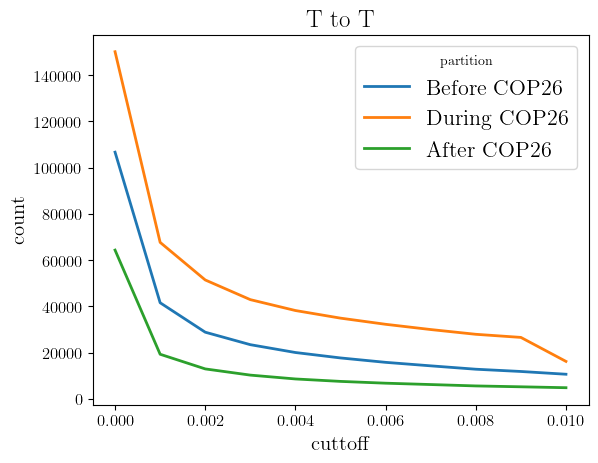

PyObject Text(0.5, 1.0, 'T to T')

In [107]:
import PyPlot as plt
import Seaborn as sns

edges = edge_types(graphs, df, cuttoffs[1])
types = sort(unique(edges["edge_type"]))
index = 1

plt.figure()
sns.lineplot(data=combined[index], x="cuttoff", y="count", hue="partition", hue_order=["Before COP26", "During COP26", "After COP26"])
plt.title(types[index])

In [81]:
flat = collect(Iterators.flatten(Iterators.flatten(graphs)));

In [25]:
using StatsBase

quantile(flat, 0.9)

0.00012148256778590419

In [88]:
sum(flat .!= -1.)

429072

In [87]:
sum(tot)

429072

In [86]:
function find_number(actors, actions)

    actors_ = unique(actors)
    actions_ = unique(actions)

    tot = Dict(["$a" => 0 for a in actions_])
    tot["remove"] = 0
    for actor in actors_

        indices = findall(actors .== actor)

        check = 0
        for a in actions_
            if any(actions[indices] .== a)
                tot["$a"] += 1
                check += 1
            end
        end

        if check == length(actions_)
            tot["remove"] += 1
        end
    end

    res = Dict()
    for a1 in actions_, a2 in actions_
        if a1 == a2
            res["$a1 to $a2"] = tot[a1] * (tot[a2] - 1)
        else
            res["$a1 to $a2"] = tot[a1] * tot[a2] - tot["remove"]
        end
    end
    return res

end

test = combine(groupby(df, "partition", sort=true), ["actor", "action"] => find_number => "count")

tot = []
for dic in test.count
    push!(tot, sum(collect(values(dic))))
end

tot

3-element Vector{Any}:
  92666
 148546
 187860

In [90]:
flat = flat[flat .!= -1]

429072-element Vector{Float64}:
 0.0
 0.013034204704854474
 0.0
 0.00071725158539782
 0.0
 0.0027943804689772424
 0.0
 0.018428734571300114
 0.0
 0.0017095985547764215
 0.0
 0.0007172515853978061
 0.0
 ⋮
 6.0244720364113915e-5
 0.0005568741198075952
 0.0350587517109145
 0.043039845271086584
 0.00036749926815376143
 6.0244720364113915e-5
 0.0029448482465996234
 0.0006853131653382558
 6.0244720364113915e-5
 0.0001208844470433744
 6.0244720364113915e-5
 0.00036749926815376143

In [113]:
quantile(flat, 0.665)

0.002032430916483337

In [31]:
354^2*4 + 403^2*4 + 278^2*4

1460036

In [37]:
3*527^2*4

3332748

In [30]:
test = combine(groupby(df, "partition"), "actor" => (x->length(unique(x))) => "count")

,partition,count
,String,Int64
1,Before COP26,354
2,During COP26,403
3,After COP26,278


In [36]:
size(graphs[1])

(527, 527)

In [42]:
function test12(df::DataFrame)

	# Get indices resulting on the unique values of df."username"
	x = df."username"
	indices = unique(i -> x[i], 1:length(x))
	# Get unique usernames and corresponding follower_count
	users = x[indices]
	followers = df."follower_count"[indices]

	# sort the users in desending order of follower_count
	sorting = sortperm(followers, rev=true)
	followers = followers[sorting]
	users = users[sorting]

    return users, followers
	# M = length(users)
	# actors = Vector{String}(undef, M)
	# N = 500
	# for i = 1:N
	# 	actors[i] = users[i]
	# end

	# L = 10000
	# N += 1
	# while true
	# 	if N + L <= M
	# 		actors[N:(N+L)] .= "$(followers[N]) to $(followers[N+L]) followers"
	# 	else
	# 		actors[N:end] .= "$(followers[N]) to $(followers[end]) followers"
	# 		break
	# 	end
	# 	N += L
	# end

	# actor_dict = Dict(zip(users, actors))
	# df = transform(df, "username" => ByRow(x -> actor_dict[x]) => "actor")
	# return df
end

users, followers = test12(df)


(["BarackObama", "cnnbrk", "CNN", "nytimes", "BBCBreaking", "BBCWorld", "NatGeo", "TheEconomist", "Reuters", "FoxNews"  …  "ssaladg", "GlobalNarration", "MarcLaurent82", "vi15321513", "justano12715638", "momolovescake1", "Dan25134456", "twoodruffe15", "JFK666666", "djg72002"], [133370649, 64103953, 60449375, 54627938, 51444766, 38851614, 28437707, 27111587, 25632514, 22814424  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
quantile(followers, 0.99)

86734.02000000104

In [50]:
followers[2000]

119430